In [1]:
import json; import pandas as pd

windowsPath = r'C:\Users\solid\Documents\Scripts\Code\MindStand\edhrec Slack export Sep 4 2016 - Oct 23 2019\shittalk\2019-07-31.json'
newPath = windowsPath.replace('\\','/')
with open(newPath) as f:
    data = json.load(f)

user_data = {}
fields = ["user"]

for field in fields:
    user_data[field] = []
    for d in data:
        user_data[field].append(d[field])

df = pd.DataFrame.from_dict(user_data)
x = set().union(*(d.keys() for d in data))
print(df)

          user
0    U286Q175Y
1    U3RJ9VDRT
2    U286Q175Y
3    UDELVDKTR
4    UDELVDKTR
..         ...
116  U3QMCLQQG
117  U33EGB4TX
118  U7VNVRSMC
119  U3RJ9VDRT
120  UEF135G05

[121 rows x 1 columns]


In [2]:
import json; import pandas as pd
os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019\shittalk")


['2019-07-31.json',
 '2019-08-01.json',
 '2019-08-04.json',
 '2019-08-10.json',
 '2019-08-14.json',
 '2019-08-25.json']

In [3]:

import spacy

nlp = spacy.load("en_core_web_sm")

text = ("In the beginning god created the heavens the earth and all of the things that lie on the earth" 
        " This is the test of a second sentence, did it work???")
doc = nlp(text)
# print(doc)

# print("verb phrases:", [chunk.text for chunk in doc.verb_chunks])
print(type(doc))
# print("Verbs:",[token.lemma_ for token in doc if token.pos_ == "VERB"])

<class 'spacy.tokens.doc.Doc'>


In [4]:
import json; import os; import pandas as pd; import spacy; from spacy.matcher import PhraseMatcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nlp = spacy.load("en_core_web_sm")

# Counting jason files in directory 
folders = os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019"); folderSize = (len(folders)); folderNames = [0]*folderSize
ii = 0

### Ignoring unnecessary json files in folder
for count in range(len(folderNames)):

    folderNames[ii] = folders[ii]   
    ii += 1

    if folderNames[ii-1] == "channels.json":
        folderNames[ii-1] = 0

    
    if folderNames[ii-1] == "integration_logs.json":
        folderNames[ii-1] = 0
    
    if folderNames[ii-1] == "users.json":
        folderNames[ii-1] = 0
###

### Removing placed zeros             
try:
    while True:
        folderNames.remove(0)
except ValueError:
    pass 
###

fileList = []; folderList = []; folderPath = [0]*len(folderNames); mainPath = []; slackContent = []; all_possible_keys = set()

jj = 0; ii = 0

### Conversion of json files to python dictionaries and collection of key value pairs
for Paths in folderNames:
    
    mainPath1 = 'C:/Users/solid/Documents/Scripts/Code/'
    mainPath2 = 'MindStand/edhrec Slack export Sep 4 2016 - Oct 23 2019/'
    folderPath[ii] = folderNames[ii]
    folderList.append(os.path.join(mainPath1,mainPath2,folderPath[ii]))
    fileIter = os.listdir(folderList[ii])
    
    for d in range(len(fileIter)):
        fileList.append(fileIter[d])  
        mainPath.append(os.path.join(folderList[ii],fileList[d]))
        mainPath[jj] = mainPath[d].replace('\\','/')
        with open(mainPath[ii], encoding="utf8") as f:
            data = json.load(f)
            slackContent.append(data)
            for d in data:

                for k in d.keys():
                    all_possible_keys.add(k)

        jj += 1
    ii += 1
###

### Creation of dataframe based on a key: [list of values] organization
main_data = {}
for stuff in slackContent:
    for p in stuff:
        for field in list(all_possible_keys):
            if field not in main_data:
                main_data[field] = []
            if field in p:
                main_data[field].append(p[field])
            else:
                main_data[field].append(None)
df = pd.DataFrame.from_dict(main_data)
###

### Iterating through dataframe and applying spacy
dataSpan = range(1000,1010,1)
test_nlp = [0]*len(dataSpan)
ii = 0
for row in dataSpan:
    test_nlp[ii] = nlp(df.text[row])
    ii += 1 
###

### Vader sentiment function
sentimentSet = []
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    sentimentSet.append(sentiment_dict)
###

# Vader needs to be in form of dataframe 
# test_vader = df.text[1000:1010].apply(sentiment_scores)
# print("verbs:",[token.lemma_ for token in test_nlp if token.pos_ == "verb"])
# print("Verbs:",[token.lemma_ for token in test_nlp if token.pos_ == "VERB"])
# print(sentimentSet[0])
# print(test_nlp)
# print(test_vader)

# Collection of verbs in a sentence
g = [token.lemma_ for token in test_nlp[0] if token.pos_ == "verb"]
print("verbs for this sentence: ",g)

# Placing verbs in a set to then 
x = set()
for verb in g:
    x.add(verb)
# print(x)
# print(df)
# print("verbs for this sentence other sentence : ",[token.lemma_ for token in test_nlp[1] if token.pos_ == "verb"])
# print("Specific verb from second sentence: ",[token.lemma_ for token in test_nlp[1] if token.pos_ == "verb"][0])


verbs for this sentence:  []


In [5]:
### Code for matching words to sentences
import spacy
from spacy.matcher import PhraseMatcher

text = """I like tomtom and I cannot lie. In computer science, artificial intelligence (AI), sometimes called machine intelligence, is intelligence demonstrated by machines, unlike the natural intelligence displayed by humans and animals.  Leading AI textbooks define the field as the study of "intelligent agents": any device that perceives its  environment and takes actions that maximize its chance of successfully achieving its goals.[1] Colloquially,  the term "artificial intelligence" is often used to describe machines (or computers) that mimic "cognitive"  functions that humans associate with the human mind, such as "learning" and "problem solving".[2] """

nlp = spacy.load("en_core_web_sm")

phrase_matcher = PhraseMatcher(nlp.vocab)
# phrases = ['machine intelligence','artificial intelligence']
phrases = ['way']
patterns = [nlp(text) for text in phrases]
phrase_matcher.add('words', None, *patterns)

doc = nlp(text)
l = set()
for sent in doc.sents:
    for match_id, start, end in phrase_matcher(nlp(sent.text)):
        if nlp.vocab.strings[match_id] in ["words"]:
            # print("lol")
            l.add(sent.text)
# print(nlp.vocab.strings[match_id])
# print(patterns)
# print(nlp(text))
print(type(text))

<class 'str'>


In [6]:
import json; import os; import pandas as pd; import spacy; from spacy.matcher import PhraseMatcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nlp = spacy.load("en_core_web_sm")

# Counting jason files in directory 
folders = os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019"); folderSize = (len(folders)); folderNames = [0]*folderSize
ii = 0

### Ignoring unnecessary json files in folder
for count in range(len(folderNames)):

    folderNames[ii] = folders[ii]   
    ii += 1

    if folderNames[ii-1] == "channels.json":
        folderNames[ii-1] = 0

    
    if folderNames[ii-1] == "integration_logs.json":
        folderNames[ii-1] = 0
    
    if folderNames[ii-1] == "users.json":
        folderNames[ii-1] = 0
###

### Removing placed zeros             
try:
    while True:
        folderNames.remove(0)
except ValueError:
    pass 
###

fileList = []; folderList = []; folderPath = [0]*len(folderNames); mainPath = []; slackContent = []; all_possible_keys = set()

jj = 0; ii = 0

### Conversion of json files to python dictionaries and collection of key value pairs
for Paths in folderNames:
    
    mainPath1 = 'C:/Users/solid/Documents/Scripts/Code/'
    mainPath2 = 'MindStand/edhrec Slack export Sep 4 2016 - Oct 23 2019/'
    folderPath[ii] = folderNames[ii]
    folderList.append(os.path.join(mainPath1,mainPath2,folderPath[ii]))
    fileIter = os.listdir(folderList[ii])
    
    for d in range(len(fileIter)):
        fileList.append(fileIter[d])  
        mainPath.append(os.path.join(folderList[ii],fileList[d]))
        mainPath[jj] = mainPath[d].replace('\\','/')
        with open(mainPath[ii], encoding="utf8") as f:
            data = json.load(f)
            slackContent.append(data)
            for d in data:

                for k in d.keys():
                    all_possible_keys.add(k)

        jj += 1
    ii += 1
###

### Creation of dataframe based on a key: [list of values] organization
main_data = {}
for stuff in slackContent:
    for p in stuff:
        for field in list(all_possible_keys):
            if field not in main_data:
                main_data[field] = []
            if field in p:
                main_data[field].append(p[field])
            else:
                main_data[field].append(None)
df = pd.DataFrame.from_dict(main_data)
###

### Iterating through dataframe and applying spacy
dataSpan = range(1000,1010,1)
test_nlp = [0]*len(dataSpan)
ii = 0
for row in dataSpan:
    test_nlp[ii] = nlp(df.text[row])
    ii += 1 
###

### Vader sentiment function
sentimentSet = []
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    sentimentSet.append(sentiment_dict)
###

# Vader needs to be in form of dataframe 
# test_vader = df.text[1000:1010].apply(sentiment_scores)
# print("Nouns:",[token.lemma_ for token in test_nlp if token.pos_ == "NOUN"])
# print("Verbs:",[token.lemma_ for token in test_nlp if token.pos_ == "VERB"])
# print(sentimentSet[0])
# print(test_nlp)
# print(test_vader)

# # Collection of nouns in a sentence
# nounIterator = [token.text for token in test_nlp[0] if token.pos_ == "NOUN"]
# print("Nouns for this sentence: ",nounIterator)

# Placing nouns in a set to then 
# nounSet = set()
# for noun in nounIterator:
#     nounSet.add(noun)
# print(x)
# print(df)
# print("Nouns for this sentence other sentence : ",[token.lemma_ for token in test_nlp[1] if token.pos_ == "NOUN"])
# print("Specific noun from second sentence: ",[token.lemma_ for token in test_nlp[1] if token.pos_ == "NOUN"][0])



# text = df.text[1000]
# text = """This is a text sentence with one of the nouns in it "killers". """
# text = df.text[dataSpan]
##### 
# phrase_matcher = PhraseMatcher(nlp.vocab)
# phrases = ['machine intelligence','artificial intelligence']
# phrases = list(nounSet)
# patterns = [nlp(text) for text in phrases]
# phrase_matcher.add("words", None, *patterns)

# doc = nlp(text)
# l = set()
# for sent in doc.sents:
#     for match_id, start, end in phrase_matcher(nlp(sent.text)):
#         if nlp.vocab.strings[match_id] in ["words"]:
#             # print("lol")
#             l.add(sent.text)
#####

nounSet = set()
ii = 0
for sentences in test_nlp:
    nounIterator = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    for noun in nounIterator:
        nounSet.add(noun)
    ii+=1     

nounData = {}
# phrases = [list(nounSet)[9]]
# phrases = ['way']


# text =','.join(df.text[dataSpan])
# text = df.text[1000]
kk = 0
for noun in nounSet:
    nounData[noun] = []
    jj = 0
    for things in dataSpan:

        phrase_matcher = PhraseMatcher(nlp.vocab)
        # phrases = list(nounSet)
        # phrases = [phrases for word in nounSet]
        # patterns = [nlp(text) for text in phrases[0]]
        # phrase_matcher.add("words", None, *patterns)
        # nounData[noun].append()
        # for  sentences in text:
        #     doc = nlp(text[sentences])
            
        # for row in dataSpan:
        #     doc = nlp(text)
        #     # patterns = [nlp(text) for text in phrases]
        #     patterns = [nlp(text) for text in phrases]
        #     phrase_matcher.add("words", None, *patterns)
        #     # ii += 1 
        # l = set()
        phrases = [list(nounSet)[kk]]
        # phrases = nounSet[noun]
        text = df.text[1000+jj]
        doc = nlp(text)
        patterns = [nlp(text) for text in phrases]
        phrase_matcher.add("words", None, *patterns)    
        
        for sent in doc.sents:
            for match_id, start, end in phrase_matcher(nlp(sent.text)):
                if nlp.vocab.strings[match_id] in ["words"]:
                    # print("lol")
                # l.add(sent.text)
                    nounData[noun].append(sent.text)
                    # print(nlp(sent.text))   
                else:
                    pass
        jj +=1
    kk +=1    
    
#########          
# nounSet = set()          
# ii = 0            
# for sentences in test_nlp:            
#     # Collection of nouns in a sentence
#     nounIterator = [token.lemma_ for token in test_nlp[ii] if token.pos_ == "NOUN"]
#     for noun in nounIterator:
#         nounSet.add(noun)
#     ii +=1            
# print(l)
# print(df.text[1000])
print(nounSet)
# print(text)
# print(type(text))
# print(patterns)
# print(nlp(sent.text))
print(nounData['killers'])
# print(type(text))
# print(jj)

{'fallout', 'ass', 'hitmen', 'skyrim', 'guys', 'man', 'mafia', 'questions', 'killers', 'luck', 'way'}
['I suppose hitmen could be defined as serial killers, there was “The Ice Man”']


In [7]:
import json; import os; import pandas as pd; import spacy; from spacy.matcher import PhraseMatcher
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

nlp = spacy.load("en_core_web_sm")

# Counting jason files in directory 
folders = os.listdir("edhrec Slack export Sep 4 2016 - Oct 23 2019"); folderSize = (len(folders)); folderNames = [0]*folderSize
ii = 0

### Ignoring unnecessary json files in folder
for count in range(len(folderNames)):

    folderNames[ii] = folders[ii]   
    ii += 1

    if folderNames[ii-1] == "channels.json":
        folderNames[ii-1] = 0

    
    if folderNames[ii-1] == "integration_logs.json":
        folderNames[ii-1] = 0
    
    if folderNames[ii-1] == "users.json":
        folderNames[ii-1] = 0
###

### Removing placed zeros             
try:
    while True:
        folderNames.remove(0)
except ValueError:
    pass 
###

fileList = []; folderList = []; folderPath = [0]*len(folderNames); mainPath = []; slackContent = []; all_possible_keys = set()

jj = 0; ii = 0

### Conversion of json files to python dictionaries and collection of key value pairs
for Paths in folderNames:
    
    mainPath1 = 'C:/Users/solid/Documents/Scripts/Code/'
    mainPath2 = 'MindStand/edhrec Slack export Sep 4 2016 - Oct 23 2019/'
    folderPath[ii] = folderNames[ii]
    folderList.append(os.path.join(mainPath1,mainPath2,folderPath[ii]))
    fileIter = os.listdir(folderList[ii])
    
    for d in range(len(fileIter)):
        fileList.append(fileIter[d])  
        mainPath.append(os.path.join(folderList[ii],fileList[d]))
        mainPath[jj] = mainPath[d].replace('\\','/')
        with open(mainPath[ii], encoding="utf8") as f:
            data = json.load(f)
            slackContent.append(data)
            for d in data:

                for k in d.keys():
                    all_possible_keys.add(k)

        jj += 1
    ii += 1
###

### Creation of dataframe based on a key: [list of values] organization
main_data = {}
for stuff in slackContent:
    for p in stuff:
        for field in list(all_possible_keys):
            if field not in main_data:
                main_data[field] = []
            if field in p:
                main_data[field].append(p[field])
            else:
                main_data[field].append(None)
df = pd.DataFrame.from_dict(main_data)
###

### Iterating through dataframe and applying spacy
dataStart = 1000
dataEnd = 1010
dataSpan = range(dataStart,dataEnd,1)
test_nlp = [0]*len(dataSpan)
ii = 0
for row in dataSpan:
    test_nlp[ii] = nlp(df.text[row])
    ii += 1 
###

### Vader sentiment function
sentimentSet = []
def sentiment_scores(sentence):
    sid_obj = SentimentIntensityAnalyzer()
    sentiment_dict = sid_obj.polarity_scores(sentence)
    print("Overall sentiment dictionary is : ", sentiment_dict)
    sentimentSet.append(sentiment_dict)
###

# Vader needs to be in form of dataframe 
# test_vader = df.text[1000:1010].apply(sentiment_scores)
# print("Nouns:",[token.lemma_ for token in test_nlp if token.pos_ == "NOUN"])
# print("Verbs:",[token.lemma_ for token in test_nlp if token.pos_ == "VERB"])
# print(sentimentSet[0])
# print(test_nlp)
# print(test_vader)

### Nouns/Verbs/Adj extracted and organized in key:value pairs 
nounSet = set()
ii = 0
for sentences in test_nlp:
    nounIterator = [token.text for token in test_nlp[ii] if token.pos_ == "NOUN"]
    for noun in nounIterator:
        nounSet.add(noun)
    ii+=1     

nounData = {}

kk = 0
for noun in nounSet:
    nounData[noun] = []
    jj = 0
    for things in dataSpan:

        phrase_matcher = PhraseMatcher(nlp.vocab)

        phrases = [list(nounSet)[kk]]

        text = df.text[dataStart+jj]
        doc = nlp(text)
        patterns = [nlp(text) for text in phrases]
        phrase_matcher.add("words", None, *patterns)    
        
        for sent in doc.sents:
            for match_id, start, end in phrase_matcher(nlp(sent.text)):
                if nlp.vocab.strings[match_id] in ["words"]:

                    nounData[noun].append(sent.text)

                else:
                    pass
        jj +=1
    kk +=1    

verbSet = set()
ii = 0
for sentences in test_nlp:
    verbIterator = [token.text for token in test_nlp[ii] if token.pos_ == "VERB"]
    for verb in verbIterator:
        verbSet.add(verb)
    ii+=1     

verbData = {}

kk = 0
for verb in verbSet:
    verbData[verb] = []
    jj = 0
    for things in dataSpan:

        phrase_matcher = PhraseMatcher(nlp.vocab)

        phrases = [list(verbSet)[kk]]

        text = df.text[dataStart+jj]
        doc = nlp(text)
        patterns = [nlp(text) for text in phrases]
        phrase_matcher.add("words", None, *patterns)    
        
        for sent in doc.sents:
            for match_id, start, end in phrase_matcher(nlp(sent.text)):
                if nlp.vocab.strings[match_id] in ["words"]:

                    verbData[verb].append(sent.text)

                else:
                    pass
        jj +=1
    kk +=1 
    
adjSet = set()
ii = 0
for sentences in test_nlp:
    adjIterator = [token.text for token in test_nlp[ii] if token.pos_ == "ADJ"]
    for adj in adjIterator:
        adjSet.add(adj)
    ii+=1     

adjData = {}

kk = 0
for adj in adjSet:
    adjData[adj] = []
    jj = 0
    for things in dataSpan:

        phrase_matcher = PhraseMatcher(nlp.vocab)

        phrases = [list(adjSet)[kk]]

        text = df.text[dataStart+jj]
        doc = nlp(text)
        patterns = [nlp(text) for text in phrases]
        phrase_matcher.add("words", None, *patterns)    
        
        for sent in doc.sents:
            for match_id, start, end in phrase_matcher(nlp(sent.text)):
                if nlp.vocab.strings[match_id] in ["words"]:

                    adjData[adj].append(sent.text)

                else:
                    pass
        jj +=1
    kk +=1 
###

print("Noun Sentences:")
print(nounData)
# print("")
# print("Verb Sentences:")
# print(verbData)
# print("")
# print("Adjectives Sentences:")
# print(adjData)
# print("")
# print("Nouns:")
# print(nounSet)
# print("")
# print("Verbs:")
# print(verbSet)
# print("")
# print("Adjectives:")
# print(adjSet)


Noun Sentences:
{'fallout': ['or just play skyrim or fallout the right way...'], 'ass': ['Well good luck with it, I hope you guys kick ass'], 'hitmen': ['I suppose hitmen could be defined as serial killers, there was “The Ice Man”'], 'skyrim': ['or just play skyrim or fallout the right way...'], 'guys': ['One of the guys in the top ten was an italian mafia hit man', 'Well good luck with it, I hope you guys kick ass'], 'man': ['One of the guys in the top ten was an italian mafia hit man'], 'mafia': ['One of the guys in the top ten was an italian mafia hit man'], 'questions': ["I'm very excited about these questions."], 'killers': ['I suppose hitmen could be defined as serial killers, there was “The Ice Man”'], 'luck': ['Well good luck with it, I hope you guys kick ass'], 'way': ['or just play skyrim or fallout the right way...']}


In [8]:
type(list(nounSet)[1])

str

In [9]:
# text, username, channel, timestamp, 
df1 = df[['text', 'thread_ts', 'user']]
df1

,text,thread_ts,user
0,<@U3QMCLQQG> has joined the channel,None,U3QMCLQQG
1,"<@U3QMCLQQG> set the channel purpose: Discuss,...",None,U3QMCLQQG
2,,None,U3QMCLQQG
3,<@U3QMCLQQG> pinned their File to this channel.,None,U3QMCLQQG
4,<@U3MTAQBE1> has joined the channel,None,U3MTAQBE1
...,...,...,...
305146,<https://magic.wizards.com/en/articles/archive...,None,U3QMCLQQG
305147,This guy failed the test for GDS2 by one quest...,None,U3QMCLQQG
305148,<https://billymoreno2.wordpress.com/2010/10/14...,None,U3QMCLQQG
305149,<@U3FV90TCZ> has joined the channel,None,U3FV90TCZ


# Data Cleaning:
## Hello
### There

```python
import hi
```

Here I clean the data...
$$x=1$$

In [10]:
def hello():
    return 'hello'

hello()

'hello'

In [11]:
print('hello')
x = 1

x

hello


1

<AxesSubplot:xlabel='user'>

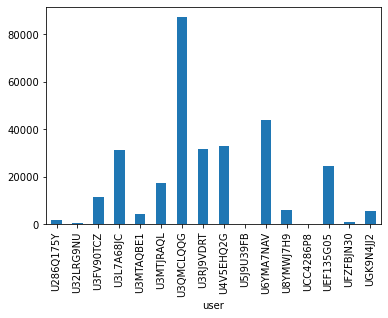

In [12]:
df1.groupby('user').size().plot(kind = 'bar')
# type(df1)

In [13]:
l = ['he has a parrot', ['parrot']], ['he has a cat and a parrot', ['cat', 'parrot']], ['she has a dog, cat, and parrot', ['dog', 'cat', 'parrot']]
test = pd.DataFrame(l, columns=['s', 'nouns'])
test

,s,nouns
0,he has a parrot,[parrot]
1,he has a cat and a parrot,"[cat, parrot]"
2,"she has a dog, cat, and parrot","[dog, cat, parrot]"


In [14]:
test.nouns.explode().unique()

array(['parrot', 'cat', 'dog'], dtype=object)

<AxesSubplot:xlabel='nouns'>

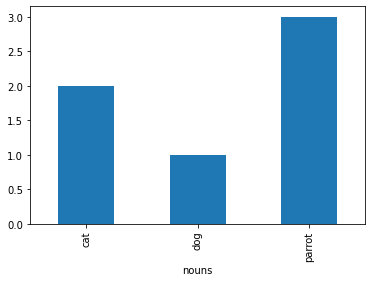

In [15]:
test.explode('nouns').groupby('nouns').size().plot(kind='bar')